# Below Cell consist of all the Necessary Imports which is required for this Challenge:

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score

# Reading the CSV file from the local location

In [97]:
data = pd.read_csv('final1.csv')

Required Columns name for the data

In [98]:
data.columns = ['User','Activity','timestamp',
                     'X-acceleration','Y-acceleration','Z-acceleration']

In [99]:
data

,User,Activity,timestamp,X-acceleration,Y-acceleration,Z-acceleration
0,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
1,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
2,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
3,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526
4,33,Jogging,49106542312000,-0.612916,10.569390,5.706926
5,33,Jogging,49106652389000,-0.503953,13.947236,7.055340
6,33,Jogging,49106762313000,-8.430995,11.413852,5.134871
7,33,Jogging,49106872299000,0.953424,1.375655,1.648062
8,33,Jogging,49106982315000,-8.199450,19.572440,2.724070
9,33,Jogging,49107092330000,1.416516,5.788648,2.982856


# Checking the data types of the dataFrame which we have.

In [100]:
data.dtypes

User                int64
Activity           object
timestamp           int64
X-acceleration    float64
Y-acceleration    float64
Z-acceleration    float64
dtype: object

# Checking how many null values in the dataframe:

In [101]:
data.isnull().values.sum()

1

In [102]:
data.isna().sum()

User              0
Activity          0
timestamp         0
X-acceleration    0
Y-acceleration    0
Z-acceleration    1
dtype: int64

# Since we have only 1 missing data we dropping the data. 

In [103]:
df = data.dropna(how='any',axis=0)

In [104]:
df.isna().sum()

User              0
Activity          0
timestamp         0
X-acceleration    0
Y-acceleration    0
Z-acceleration    0
dtype: int64

In [105]:
df.isnull().values.sum()

0

# The main objective of the graph is to visualize how the Activity column in the dataframe is releated with the User column in the dataframe.

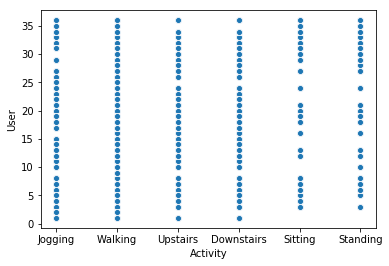

In [107]:
sns.scatterplot(x="Activity", y="User", data=df)

# Spliting test and train data. We are splitting train and test data randomly with ration of 7:3 which mean 70% of data for training and 30% of the data for testing

In [108]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.3)

# Number of test and the training data

In [109]:
trainingSet.shape

(760524, 6)

In [110]:
testSet.shape

(325939, 6)

# Dropping the target variable from the data set

In [111]:
y_trainingSet=trainingSet['Activity']

In [112]:
x_trainingSet=trainingSet.drop(['Activity'],axis=1)

In [113]:
y_testSet=testSet['Activity']

In [114]:
x_testSet=testSet.drop(['Activity'],axis=1)

In [115]:
x_testSet

,User,timestamp,X-acceleration,Y-acceleration,Z-acceleration
130165,13,3091792277000,-0.990000,8.240000,3.377846
824893,31,24682461922000,-1.330000,10.310000,-0.650000
563379,14,58142742291000,5.330000,8.080000,0.310000
248736,36,14495772321000,-2.220000,8.810000,1.797886
180457,6,3544242198000,-1.920000,6.780000,-2.410802
528691,14,60173082347000,-4.100000,8.350000,-4.630000
109169,13,1518012157000,2.560000,13.180000,4.944186
428289,10,5076662304000,0.190000,19.310000,1.330000
1052407,19,130232761537000,-19.230000,-2.260000,0.720000
1025985,7,208342301545000,3.150000,6.320000,-1.380000


# RandomForestClassifier model is used for the chellenge.Before that i tried decision tree since i get only less amount of accuracy i am using RandomForestClassifier.

In [116]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
trained_model=classifier.fit(x_trainingSet, y_trainingSet)

In [117]:
predictions = trained_model.predict(x_testSet)

# Training Accuracy_score

In [118]:
accuracy_score(y_trainingSet, trained_model.predict(x_trainingSet))

0.9986496152652645

# Test Data Accuracy score which is 98.4098%

In [119]:
accuracy_score(y_testSet, predictions)

0.9833619174139946

In [120]:
confusion_matrix(y_testSet, predictions)

array([[ 28228,    198,      0,      1,   1393,     38],
       [    14, 100585,      0,      0,     11,    331],
       [     1,     11,  18227,      0,      2,      3],
       [    17,      0,      1,  14537,      2,      4],
       [  2220,    283,      1,      0,  34515,     38],
       [    12,    827,      1,      1,     13, 124424]], dtype=int64)

# Verification
##First column represent the predicitions and the second column represent the data from Y_testset(Which is used in test phase).

In [121]:
for i, j in zip(y_testSet,range(10)):
    print(predictions[j],i)

Downstairs Downstairs
Downstairs Downstairs
Upstairs Upstairs
Upstairs Upstairs
Walking Walking
Walking Walking
Jogging Jogging
Upstairs Upstairs
Jogging Jogging
Walking Walking


# Conclusion
We achieved the accuracy of 98%. We split the train and test data set by 7:3 ratio.
Only 1 row of data is dropped.
Only 5% of data is dropped because of the data nature mismatch.